### 따릉이 데이터를 활용한 데이터 분석
   - 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요

- id 고유 id
- hour 시간
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
train = pd.read_csv('./data/dacon_data/따릉이/train.csv')
test = pd.read_csv('./data/dacon_data/따릉이/test.csv')
submission = pd.read_csv('./data/dacon_data/따릉이/submission.csv')

In [3]:
train.info()
train.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


In [4]:
train.corrwith(train['count'])

id                       -0.002131
hour                      0.626047
hour_bef_temperature      0.619404
hour_bef_precipitation   -0.163985
hour_bef_windspeed        0.459906
hour_bef_humidity        -0.471142
hour_bef_visibility       0.299094
hour_bef_ozone            0.477614
hour_bef_pm10            -0.114288
hour_bef_pm2.5           -0.134293
count                     1.000000
dtype: float64

id


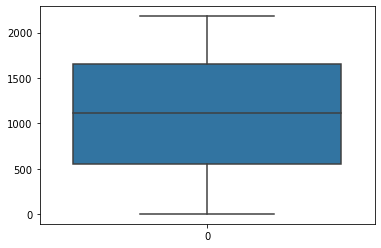

hour


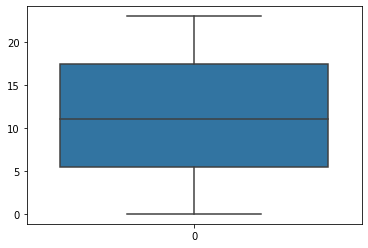

hour_bef_temperature


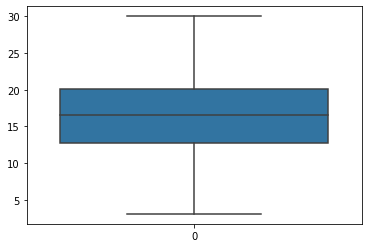

hour_bef_precipitation


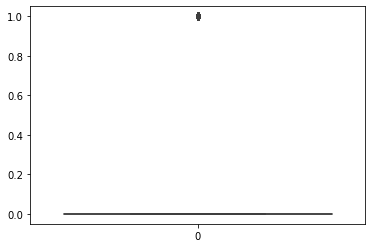

hour_bef_windspeed


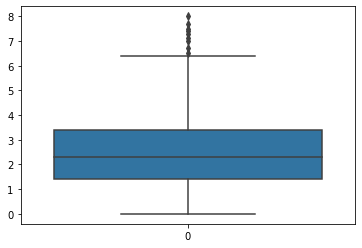

hour_bef_humidity


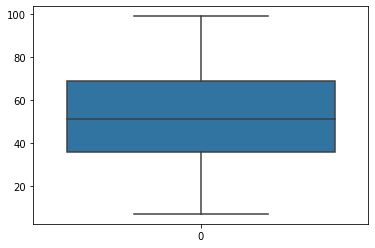

hour_bef_visibility


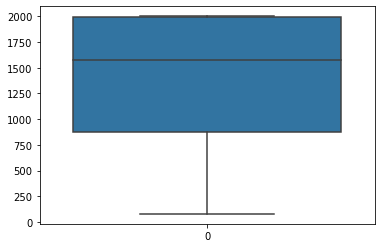

hour_bef_ozone


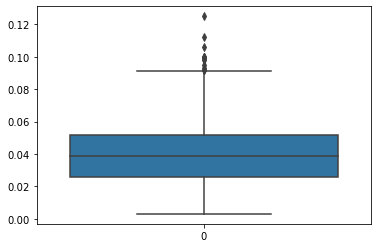

hour_bef_pm10


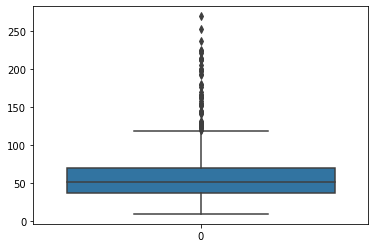

hour_bef_pm2.5


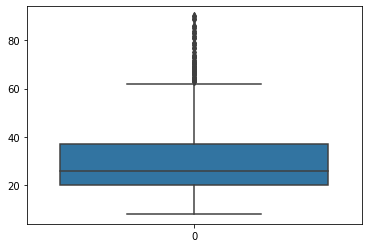

count


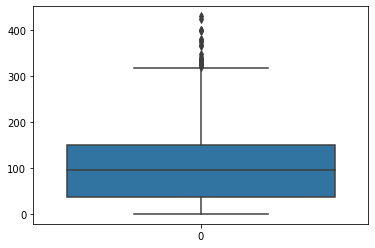

In [5]:
for idx, feature in enumerate(train) :
    print(feature)
    sns.boxplot(data = train[feature])
    plt.show()
    plt.close()
    

In [6]:
def outlier(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return data[(data < lower_bound) | (data > upper_bound)].index

In [17]:
outlier_index_hour_bef_precipitation = outlier(train.hour_bef_precipitation)
print(outlier_index_hour_bef_precipitation)
print()
outlier_index_hour_bef_windspeed = outlier(train.hour_bef_windspeed)
print(outlier_index_hour_bef_windspeed)
print()
outlier_index_hour_bef_ozone = outlier(train.hour_bef_ozone)
print(outlier_index_hour_bef_ozone)
print()
outlier_index_hour_bef_pm10 = outlier(train['hour_bef_pm10'])
print(outlier_index_hour_bef_pm10)
print()
outlier_index_hour_bef_pm2 = outlier(train['hour_bef_pm2.5'])
print(outlier_index_hour_bef_pm2)
print()
outlier_index_count = outlier(train['count'])
print(outlier_index_count)
print()

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([   4,   67,  107,  238,  245,  294,  402,  422,  448,  452,  499,
             526,  531,  652,  654,  721,  803,  884, 1103, 1135, 1301, 1394,
            1430],
           dtype='int64')



In [19]:
outlier_index_hour_bef_ozone = outlier(train.hour_bef_ozone)
print(outlier_index_hour_bef_ozone)
print()

Int64Index([], dtype='int64')



In [ ]:
train['hour_bef_windspeed'].dtype()

In [20]:
for i in train.columns:
    print('{}:{}'.format(i,skew(train[i])))

id:-0.023425762918823995
hour:0.0036552757086815526
hour_bef_temperature:nan
hour_bef_precipitation:nan
hour_bef_windspeed:nan
hour_bef_humidity:nan
hour_bef_visibility:nan
hour_bef_ozone:nan
hour_bef_pm10:nan
hour_bef_pm2.5:nan
count:0.9115952317125152


In [ ]:
train.hour_bef